In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Load the dataset 
file_path = 'temperature.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
print(data.head())

   station        Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
0      1.0  30-06-2013          28.7          21.4    58.255688    91.116364   
1      2.0  30-06-2013          31.9          21.6    52.263397    90.604721   
2      3.0  30-06-2013          31.6          23.3    48.690479    83.973587   
3      4.0  30-06-2013          32.0          23.4    58.239788    96.483688   
4      5.0  30-06-2013          31.4          21.9    56.174095    90.155128   

   LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS    LDAPS_LH  ...  LDAPS_PPT2  \
0         28.074101         23.006936  6.818887   69.451805  ...         0.0   
1         29.850689         24.035009  5.691890   51.937448  ...         0.0   
2         30.091292         24.565633  6.138224   20.573050  ...         0.0   
3         29.704629         23.326177  5.650050   65.727144  ...         0.0   
4         29.113934         23.486480  5.735004  107.965535  ...         0.0   

   LDAPS_PPT3  LDAPS_PPT4      lat    

station              2
Date                 2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64
           station  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
count  7750.000000   7682.000000   7682.000000  7677.000000  7677.000000   
mean     13.000000     29.768211     23.225059    56.759372    88.374804   
std       7.211568      2.969999      2.413961    14.668111     7.192004   
min       1.000000     20.000000     11.300000    19.794666    58.936283   
25%       7.000000     27.800000

C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


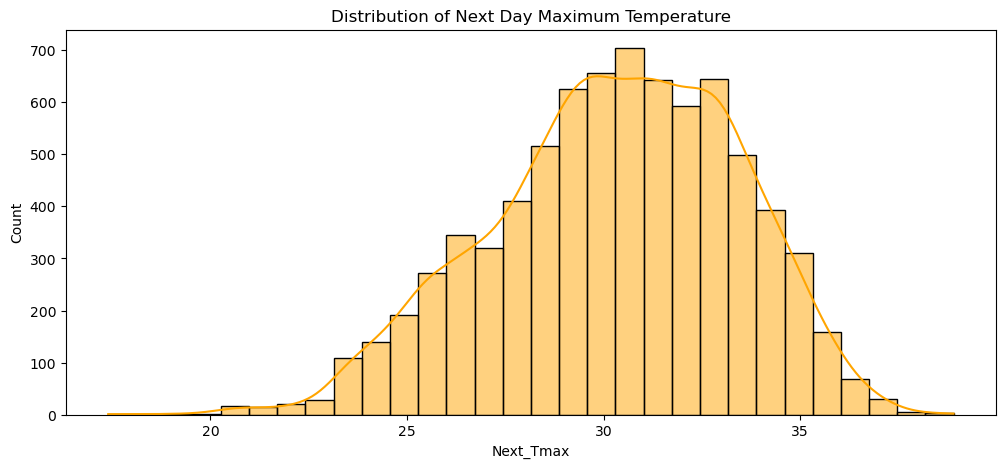

AttributeError: module 'matplotlib.pyplot' has no attribute 'fugure'

In [3]:
# Check for missing values
print(data.isnull().sum())

# Summary statistics
print(data.describe())

# Visualize distributions of next_tmax and next_Tmin
plt.figure(figsize=(12, 5))
sns.histplot(data['Next_Tmax'], bins=30, kde=True, color='orange')
plt.title('Distribution of Next Day Maximum Temperature')
plt.show()

plt.fugure(figsize=(12, 5))
sns.histplot(data['Next_Tmin'], bins=30, kde=True, color='blue')
plt.title('Distribution of Next Day Minimum Temperature')
plt.show()

In [5]:
# Update the column names based on the actual names in the dataset
data_cleaned = data.drop(columns=['station', 'Date', 'Solar radiation'])

# Check for and drop any remaining missing values
data_cleaned = data_cleaned.dropna()

# Display the first few rows of the cleaned dataset
print(data_cleaned.head())

   Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  LDAPS_Tmax_lapse  \
0          28.7          21.4    58.255688    91.116364         28.074101   
1          31.9          21.6    52.263397    90.604721         29.850689   
2          31.6          23.3    48.690479    83.973587         30.091292   
3          32.0          23.4    58.239788    96.483688         29.704629   
4          31.4          21.9    56.174095    90.155128         29.113934   

   LDAPS_Tmin_lapse  LDAPS_WS    LDAPS_LH  LDAPS_CC1  LDAPS_CC2  ...  \
0         23.006936  6.818887   69.451805   0.233947   0.203896  ...   
1         24.035009  5.691890   51.937448   0.225508   0.251771  ...   
2         24.565633  6.138224   20.573050   0.209344   0.257469  ...   
3         23.326177  5.650050   65.727144   0.216372   0.226002  ...   
4         23.486480  5.735004  107.965535   0.151407   0.249995  ...   

   LDAPS_PPT1  LDAPS_PPT2  LDAPS_PPT3  LDAPS_PPT4      lat      lon       DEM  \
0         0.0         0

In [6]:
# Define the target variables
y_max = data_cleaned['Next_Tmax']
y_min = data_cleaned['Next_Tmin']

# Drop the target variables from the features dataset
X = data_cleaned.drop(columns=['Next_Tmax', 'Next_Tmin'])

# Display the shapes of the features and target datasets
print("Features shape:", X.shape)
print("Target (Max Temp) shape:", y_max.shape)
print("Target (Min Temp) shape:", y_min.shape)

Features shape: (7590, 20)
Target (Max Temp) shape: (7590,)
Target (Min Temp) shape: (7590,)


In [8]:
from sklearn.model_selection import train_test_split
# split the dataset into training and testing sets

X_train, X_test, y_max_train, y_max_test,y_min_train, y_min_test =train_test_split(
    X, y_max, y_min, test_size=0.2, random_state=42
)

# Display the shapes of the training and testing sets
print("Training set shape (X):", X_train.shape)
print("Training set shape (X):", X_test.shape)
print("Training set shape (y_max):", y_max_train.shape)
print("Training set shape (y_max):", y_max_test.shape)
print("Training set shape (y_min):", y_min_train.shape)
print("Training set shape (y_min):", y_min_test.shape)

Training set shape (X): (6072, 20)
Training set shape (X): (1518, 20)
Training set shape (y_max): (6072,)
Training set shape (y_max): (1518,)
Training set shape (y_min): (6072,)
Training set shape (y_min): (1518,)


In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Initialize Linear Regression models for max and min temperature predictions
model_max = LinearRegression()
model_min = LinearRegression()

# Train the model
model_max.fit(X_train, y_max_train)
model_min.fit(X_train, y_min_train)

# Make predictions on the test set
y_max_pred = model_max.predict(X_test)
y_min_pred = model_min.predict(X_test)

# Evaluate the models
mse_max = mean_squared_error(y_max_test, y_max_pred)
mae_max = mean_absolute_error(y_max_test, y_max_pred)

mse_min = mean_squared_error(y_min_test, y_min_pred)
mae_min = mean_absolute_error(y_min_test, y_min_pred)

# Display evaluation metrics
print("Maximum Temperature Prediction:")
print("Mean Squared Error (MSE):", mse_max)
print("Mean Absolute Error (MAE):", mae_max)

print("\nMaximum Temperature Prediction:")
print("Mean Squared Error (MSE):", mse_min)
print("Mean Absolute Error (MAE):", mae_min)


Maximum Temperature Prediction:
Mean Squared Error (MSE): 2.0360541601663913
Mean Absolute Error (MAE): 1.0879923007949253

Maximum Temperature Prediction:
Mean Squared Error (MSE): 0.9625442335573167
Mean Absolute Error (MAE): 0.7610679437222135


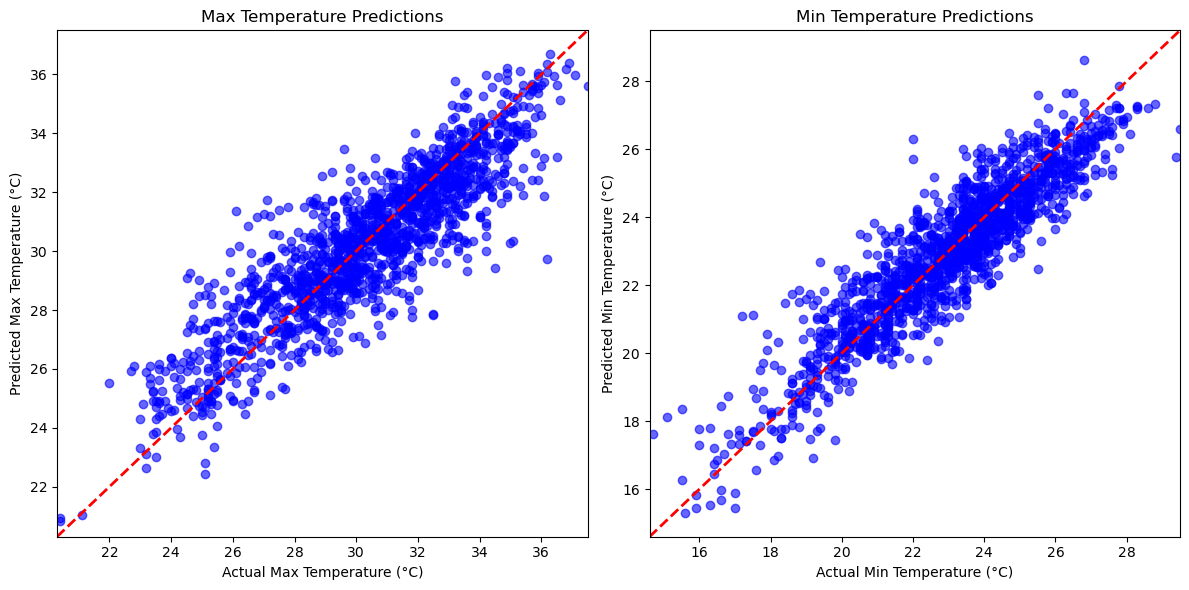

In [16]:
import matplotlib.pyplot as plt

# Plotting Maximum Temperature Predictions
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(y_max_test, y_max_pred, alpha=0.6, color='blue')
plt.plot([y_max_test.min(), y_max_test.max()],[y_max_test.min(), y_max_test.max()], 'r--', lw=2)
plt.title('Max Temperature Predictions')
plt.xlabel('Actual Max Temperature (°C)')
plt.ylabel('Predicted Max Temperature (°C)')
plt.xlim([y_max_test.min(), y_max_test.max()])
plt.ylim([y_max_test.min(), y_max_test.max()])


# Plotting Minimum Temperature Predictions
plt.subplot(1, 2, 2)
plt.scatter(y_min_test, y_min_pred, alpha=0.6, color='blue')
plt.plot([y_min_test.min(), y_min_test.max()],[y_min_test.min(), y_min_test.max()], 'r--', lw=2)
plt.title('Min Temperature Predictions')
plt.xlabel('Actual Min Temperature (°C)')
plt.ylabel('Predicted Min Temperature (°C)')
plt.xlim([y_min_test.min(), y_min_test.max()])
plt.ylim([y_min_test.min(), y_min_test.max()])

plt.tight_layout()
plt.show()

In [20]:
import joblib

# Save the models
joblib.dump(model_max, 'max_temperature_model.pkl')
joblib.dump(model_min, 'min_temperature_model.pkl')

print("Models saved sucessfully!")

Models saved sucessfully!


In [34]:
# Load the models
loaded_model_max = joblib.load('max_temperature_model.pkl')
loaded_model_min = joblib.load('min_temperature_model.pkl')

new_data = pd.DataFrame({
    'Present_Tmax': [30.0],
    'Present_Tmin': [20.0],
    'LDAPS_RHmin': [50.0],
    'LDAPS_RHmax': [60.0],
    'LDAPS_Tmax_lapse': [28.0],
    'LDAPS_Tmin_lapse': [18.0],
    'LDAPS_WS': [5.0],
    'LDAPS_LH': [150.0],
    'LDAPS_CC1': [0.5],
    'LDAPS_CC2': [0.6],
    'LDAPS_CC3': [0.4],
    'LDAPS_CC4': [0.3],
    'LDAPS_PPT1': [0.0],
    'LDAPS_PPT2': [0.0],
    'LDAPS_PPT3': [0.0],
    'LDAPS_PPT4': [0.0],
    'lat' : [37.5],
    'lon' : [126.9],
    'DEM' : [100.0],
    'Slope': [2.0]
})

# Predicting mext-day maximum and minimum temperatures
predicited_max_temp = loaded_model_max.predict(new_data)
predicited_min_temp = loaded_model_min.predict(new_data)

print(f"Predicted Next-Day Maximum Temperature: {predicted_max_temp[0]}")
print(f"Predicted Next-Day Minimum Temperature: {predicted_min_temp[0]}")

Predicted Next-Day Maximum Temperature: 29.169296142093998
Predicted Next-Day Minimum Temperature: 18.305208688124182


In [35]:
# Load the saved models
loaded_model_max = joblib.load('max_temperature_model.pkl')
loaded_model_min = joblib.load('min_temperature_model.pkl')

print("Models loaded sucessfully!")

Models loaded sucessfully!
